[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Mitchell-Mirano/Allison/blob/develop/examples/clustering/k-means.ipynb)

In [190]:
!pip install "allison @ git+https://github.com/Mitchell-Mirano/Allison.git@develop"

zsh:1: command not found: pip


In [191]:
import pandas as pd
import matplotlib.pyplot as plt
from allison.clustering import Kmeans

In [192]:
data=pd.read_csv("../data/Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [193]:
data['labels'] = data.Species.map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,labels
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


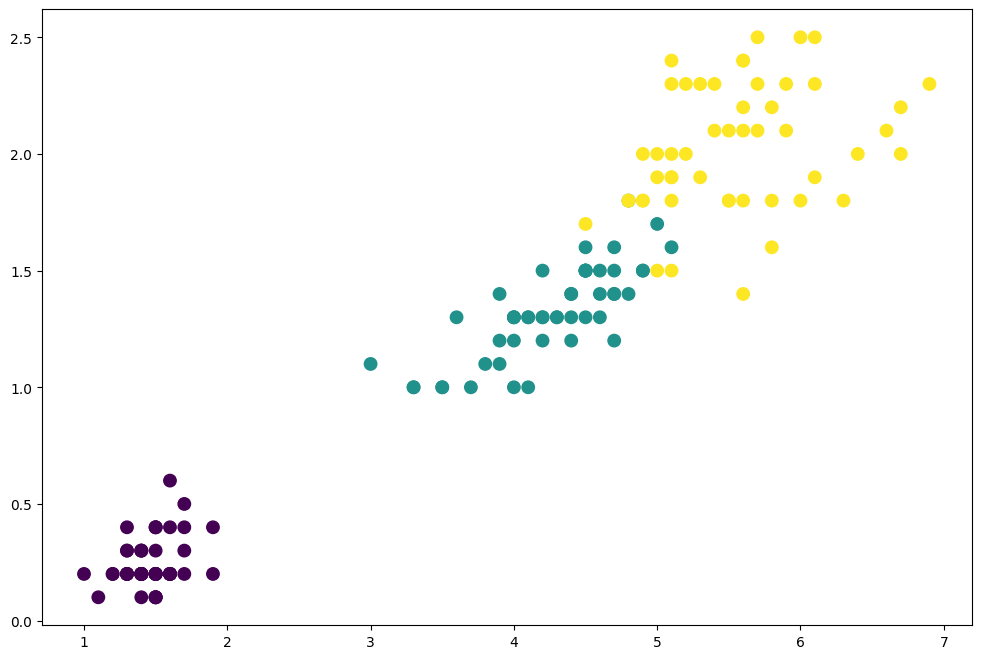

In [194]:
plt.figure(figsize=(12,8))
plt.scatter(data['PetalLengthCm'],data['PetalWidthCm'],s=80, c=data['labels'])

In [195]:
X=data[['PetalLengthCm','PetalWidthCm','PetalLengthCm','PetalWidthCm']]
X

,PetalLengthCm,PetalWidthCm,PetalLengthCm,PetalWidthCm
0,1.4,0.2,1.4,0.2
1,1.4,0.2,1.4,0.2
2,1.3,0.2,1.3,0.2
3,1.5,0.2,1.5,0.2
4,1.4,0.2,1.4,0.2
...,...,...,...,...
145,5.2,2.3,5.2,2.3
146,5.0,1.9,5.0,1.9
147,5.2,2.0,5.2,2.0
148,5.4,2.3,5.4,2.3


In [196]:
model= Kmeans(n_centroids=3)
model.fit(X)

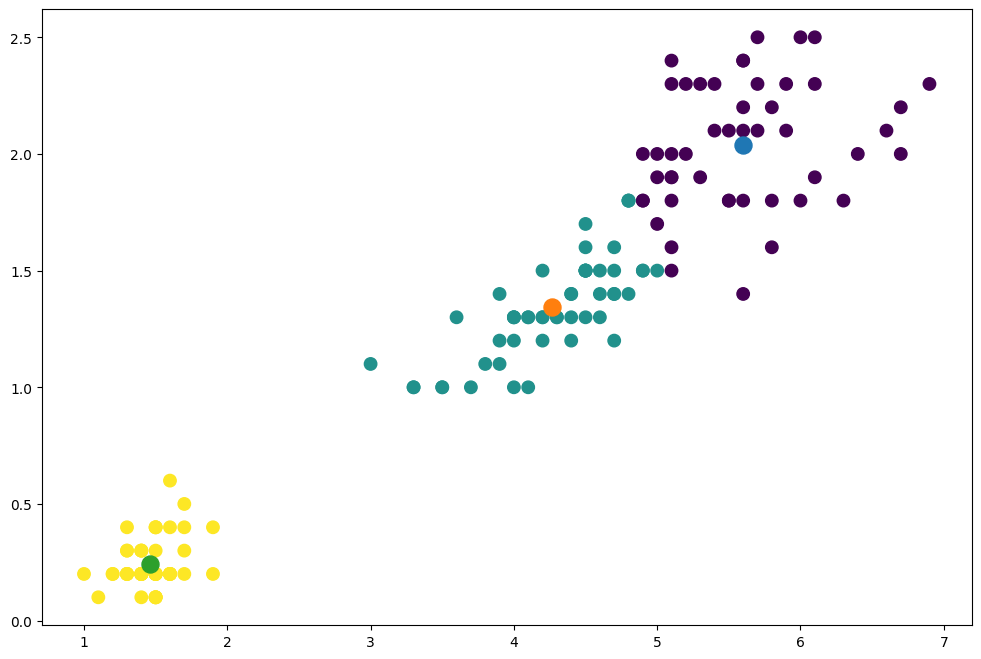

In [197]:
pred_labels = model.predict(X)
plt.figure(figsize=(12,8))
plt.scatter(data['PetalLengthCm'],data['PetalWidthCm'],s=80, c=pred_labels)

for centroid in model.centroids:
    plt.scatter(centroid[0],centroid[1], s=150)

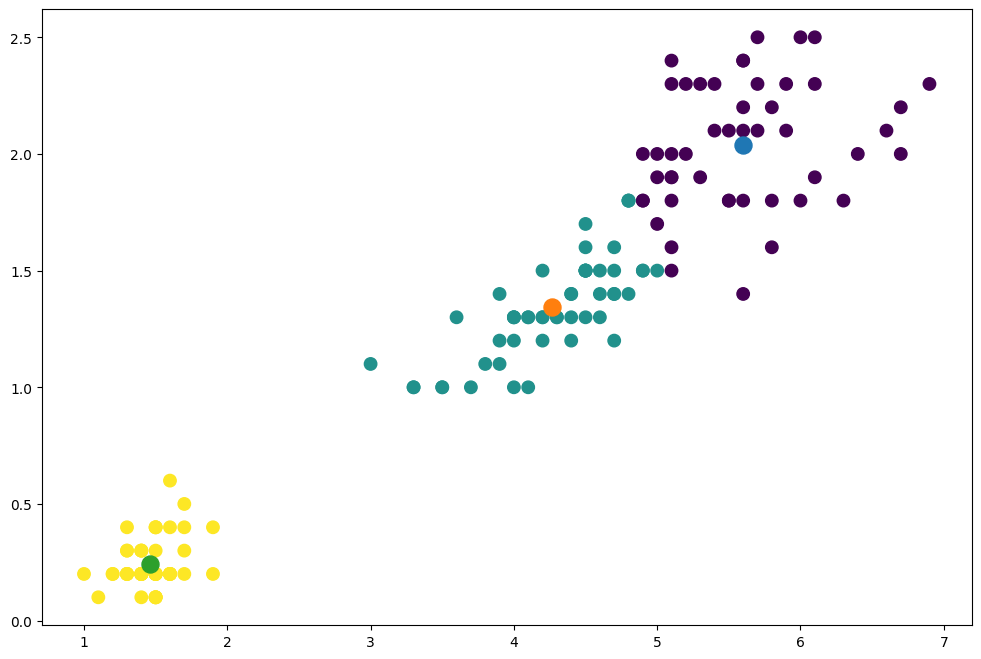

In [198]:
pred_labels = model.predict(X)
plt.figure(figsize=(12,8))
plt.scatter(data['PetalLengthCm'],data['PetalWidthCm'],s=80, c=pred_labels)

for centroid in model.centroids:
    plt.scatter(centroid[0],centroid[1], s=150)

In [199]:
model.get_distances(X)

array([[4.19628472e+01, 1.90747041e+01, 1.20640000e-02],
       [4.19628472e+01, 1.90747041e+01, 1.20640000e-02],
       [4.36611806e+01, 2.02423964e+01, 5.76640000e-02],
       [4.03045139e+01, 1.79470118e+01, 6.46400000e-03],
       [4.19628472e+01, 1.90747041e+01, 1.20640000e-02],
       [3.57178472e+01, 1.49777811e+01, 1.60064000e-01],
       [4.12478472e+01, 1.86377811e+01, 1.44640000e-02],
       [4.03045139e+01, 1.79470118e+01, 6.46400000e-03],
       [4.19628472e+01, 1.90747041e+01, 1.20640000e-02],
       [4.10595139e+01, 1.84239349e+01, 4.40640000e-02],
       [4.03045139e+01, 1.79470118e+01, 6.46400000e-03],
       [3.86861806e+01, 1.68593195e+01, 4.08640000e-02],
       [4.27178472e+01, 1.95516272e+01, 4.96640000e-02],
       [4.79328472e+01, 2.31747041e+01, 3.06464000e-01],
       [4.53995139e+01, 2.14500888e+01, 1.43264000e-01],
       [3.89145139e+01, 1.71131657e+01, 5.12640000e-02],
       [4.22711806e+01, 1.94085503e+01, 1.02464000e-01],
       [4.12478472e+01, 1.86377

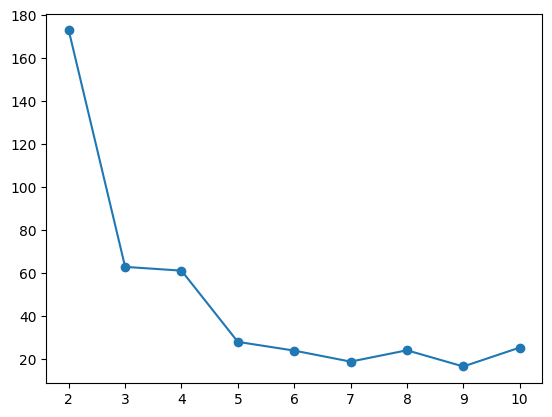

In [221]:
inertias = []

for i in range(2,11):
    model = Kmeans(n_centroids=i)
    model.fit(X)
    inertias.append(model.get_inertia(X))

import matplotlib.pyplot as plt
plt.plot(range(2,11), inertias, marker='o')